In [49]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

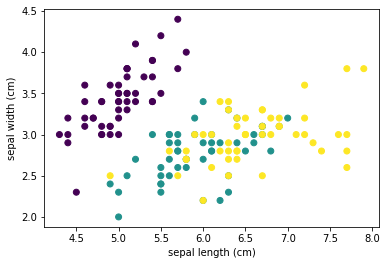

In [50]:
iris = datasets.load_iris()
data = iris.data[:,:2]
label = iris.target
plt.scatter(data[:,0],data[:,1],c = label)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

In [51]:
bias = np.min(data,axis=0)
data = data - bias
max_data = np.max(data,axis = 0)
data = data / max_data
data = data.tolist()

In [52]:
def svm_sgd(data, label, epochs = 15000):
  w = np.zeros(data[0].shape[0])
  alpha = 0.0003
  w_hist = [w]

  for i in range(epochs):
    error = 0
    for j in range(len(data)):
      if(np.dot(w, data[j])* label[j]  < 1):
        w = w + alpha* (data[j]*label[j] - 0.5*w/(i+1))
      else:
        w = w + alpha * (-0.5 * (w/(i+1)))
    w_hist.append(w)
  return w

coef = 100

def cost(w, data, label):
  cost = 0
  for i in range(len(data)):
    cost +=  coef * max(0, 1 - label[i] * np.dot(w.T,data[i]))
  return 0.5 * np.sum(np.square(w)) + cost/len(data)

def grad(w, data, label) :
  w_  = np.zeros(len(w))
  for i in range(len(data)):
    if( max(0, 1 - label[i] * np.dot(w.T,data[i]))== 0 ):
      w_ += w
    else:
      w_ = w - coef*label[i]*data[i,:]
  return w_/len(label)

def svm_arm(data, label, epochs = 5000):
  w = np.random.normal(0,0.01,data[0].shape[0])
  for i in range(epochs):
    alpha = 1
    beta = 0.1
    c = 0.5
    while(cost(w - alpha*grad(w,data,label),data,label) > cost(w ,data,label) - c *alpha*np.sum(np.square(grad(w,data,label)))):
      alpha = beta * alpha
    w = w - alpha * grad(w,data, label  )
  return w





In [53]:
def predict(w,data):
  pred_vec = []
  for i in range(len(data)):
    y = np.dot(w.T,data[i,:]) 
    pred_vec.append(int(y>0))
    if(pred_vec[-1] == 0):
      pred_vec[-1] = -1
  return pred_vec

def find_metrics(source_vec,target_vec):
  tp, tn, fp, fn = 0,0,0,0
  for i in range(len(source_vec)):
    if(target_vec[i] == 1):
      if(source_vec[i] == 1):
        tp += 1
      else:
        fp += 1
    else:
      if(source_vec[i] == -1):
        tn += 1
      else:
        fn += 1
  accuracy = (tp+tn)/(tp+tn+fn+fp)
  return tp,tn,fp,fn,accuracy


def confusion_matrix(tp,tn,fp,fn):
  print("             confusion matrix     ")
  print("          positive     negative      ")
  print("positive:    {}            {}        ".format(tp,fp))
  print("negative:    {}            {}        ".format(fn,tn))

def confidence_matrix(tp,tn,fp,fn,count):
  print("              confidence matrix     ")
  print("           positive    negative                      ")
  print("positive:    {}            {}        ".format(round(tp/count,2),round(fp/count,2)))
  print("negative:    {}            {}        ".format(round(fn/count,2),round(tn/count,2)))

In [54]:
def p2(data, label,debug = False, method = 'sgd', epochs = 15000):
  targets = np.unique(label)
  data = np.c_[data,np.ones(len(data))]
  weights = np.zeros((3,3))
  metrics = np.zeros((3,5))

  for i in targets:
    y = deepcopy(label)
    y[ y != i ] = -1
    y[ y == i ] = 1

    if(method == 'sgd'):
      weights[i,:] = svm_sgd(data,y,epochs)
    elif(method == 'armijo'):
      weights[i,:] = svm_arm(data,y,epochs)
    src =  predict(weights[i,:],data)
    metrics[i,:] = find_metrics(src,y)
    
    if(debug):
      print("   group = {}".format(i))
      confusion_matrix(metrics[i,0], metrics[i,1], metrics[i,2], metrics[i,3])
      confidence_matrix(metrics[i,0], metrics[i,1], metrics[i,2], metrics[i,3],len(data))
      print()

  accuracy = np.mean(metrics[:,4])
  if(debug):
    print("accuracy = {}".format(accuracy))
  return weights


In [55]:
weigths = p2(data, label,debug=True,method='sgd',epochs = 14000)
weigths

   group = 0
             confusion matrix     
          positive     negative      
positive:    49.0            1.0        
negative:    0.0            100.0        
              confidence matrix     
           positive    negative                      
positive:    0.33            0.01        
negative:    0.0            0.67        

   group = 1
             confusion matrix     
          positive     negative      
positive:    20.0            30.0        
negative:    9.0            91.0        
              confidence matrix     
           positive    negative                      
positive:    0.13            0.2        
negative:    0.06            0.61        

   group = 2
             confusion matrix     
          positive     negative      
positive:    37.0            13.0        
negative:    14.0            86.0        
              confidence matrix     
           positive    negative                      
positive:    0.25            0.09        
negative:

array([[-9.01764511,  7.18231399, -0.70346947],
       [-0.51380493, -5.74952515,  1.89288177],
       [ 6.61201926, -0.15774091, -3.49996578]])

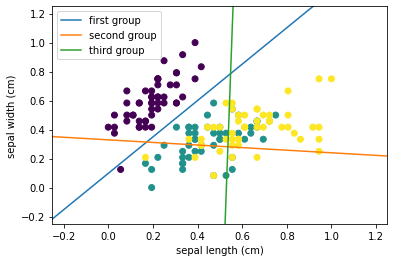

In [56]:
x = np.linspace(-1,3,80)
legend = ["first group", "second group","third group"]
for i in range(len(weigths[0,:])):
  plt.plot(x, -x * weigths[i,0]/weigths[i,1] - weigths[i,2]/weigths[i,1], label = legend[i])

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.scatter([data[i][0] for i in  range(len(data))],[data[i][1] for i in range(len(data))],c = label)
plt.axis([-0.25,1.25,-0.25,1.25])
plt.legend()
plt.show()


accuracy_score = 0.82
[[50  0  0]
 [ 0 38 12]
 [ 0 15 35]]


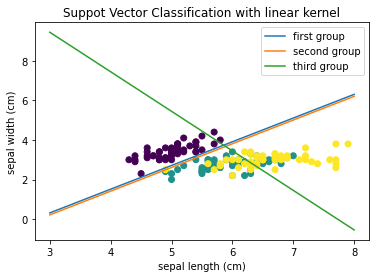

In [44]:
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix
iris = datasets.load_iris()
data = iris.data[:,:2]
label = iris.target


svc = svm.SVC(kernel='linear', C=30,gamma='auto')
svc = svc.fit(data, label)
y = svc.predict(data)
print("accuracy_score = {}".format(accuracy_score(label,y)) )
print(confusion_matrix(label, y))


plt.title('Suppot Vector Classification with linear kernel')
weigths = svc.coef_
weigths = np.c_[weigths, svc.intercept_]

x = np.linspace(3,8,80)
legend = ["first group", "second group","third group"]
for i in range(len(weigths[0,:])):
  plt.plot(x, -x * weigths[i,0]/weigths[i,1] - weigths[i,2]/weigths[i,1], label = legend[i])

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.scatter(data[:,0],data[:,1],c = label)
plt.legend()
plt.show()